In [1]:
%pylab inline
import datetime as dt
from davitpy.models import raydarn
import davitpy
import pandas
import numpy as np
import os

Re = davitpy.utils.Re

Populating the interactive namespace from numpy and matplotlib


In [2]:
sTime = dt.datetime(2012, 9, 20, 16, 0)
eTime = dt.datetime(2012, 9, 20, 16, 0)
UTstart = sTime.hour + sTime.minute/60.
UTend = eTime.hour + eTime.minute/60.
radar = 'sas'
beam = 3
freq = 15
elev = (8, 40, 0.1)


In [3]:
# Run the ray tracing for the specified period, radar, beam and frequency
# Use 4 threads (MPI) and output everything to /tmp

try:
    os.remove('/tmp/iscat.0.dat')
except:
    pass
try:
    os.remove('/tmp/gscat.0.dat')
except:
    pass

rto = raydarn.RtRun(sTime, eTime, 
    rCode=radar, beam=beam, freq=freq, 
    outDir='/tmp', nprocs=4,elev=elev)

In [4]:
# Read rays into memory
rto.readRays()

In [5]:
#rto.rays.paths[dt.datetime(2012, 9, 20, 7, 0)]

In [6]:
#rto.elev

/usr/local/lib/python2.7/dist-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/usr/local/lib/python2.7/dist-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


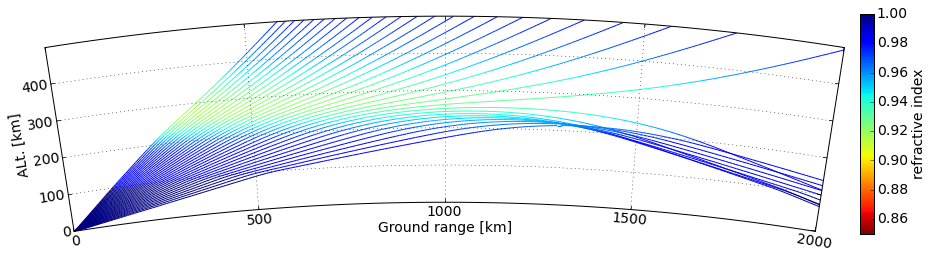

In [7]:
# Plot rays with refractive index color scale
# Plot 1 ray in 10 (1deg increment)
# Plot at start time
figure(figsize=(15,5))
rcParams.update({'font.size': 14})

ax, aax, cbax = rto.rays.plot(sTime, step=10, showrefract=True, nr_lim=[.85,1])

ax.grid()

In [8]:
# Read electron densities into memory
rto.readEdens()

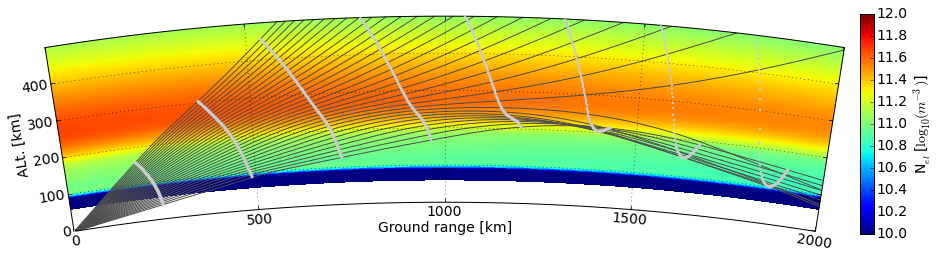

In [9]:
# Plot rays and electron densities together
# Plot at start time
# Plot range markers (every 250 km)
figure(figsize=(15,5))
rcParams.update({'font.size': 14})

ax, aax, cbax = rto.ionos.plot(sTime)
ax, aax, cbax = rto.rays.plot(sTime, 
    step=10, ax=ax, aax=aax)
rto.rays.showRange()

ax.grid()

In [10]:
# Read ionospheric and ground scatter into memory
rto.readScatter()

In [11]:
# rto.rays.writeToAscii('/home/davitpy/Desktop/rays.txt')

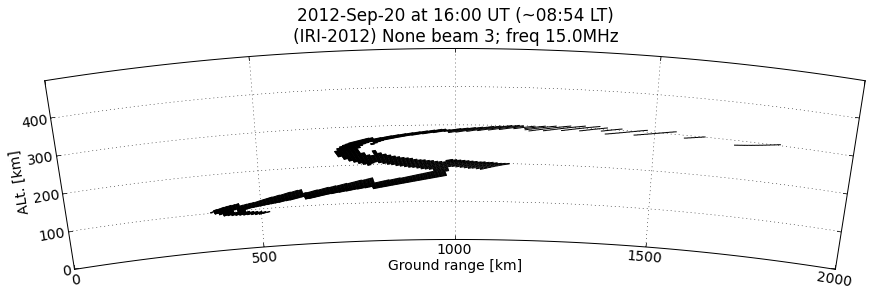

In [12]:
# Plot ionospheric and ground scatter together
# Plot at start time
# Plot relative strength of ionospheric scatter
figure(figsize=(15,5))
rcParams.update({'font.size': 14})

ax, aax, cax = rto.scatter.plot(sTime, title=True, weighted=False)

ax.grid()

In [13]:
#rto.scatter.isc

In [14]:
kt = rto.scatter.isc.keys()[0]
kb = rto.scatter.isc[kt].keys()[0]


In [15]:
dict_list = []
for kt in rto.scatter.isc.keys():
    for kb in rto.scatter.isc[kt].keys():
        elv_dict = rto.scatter.isc[kt][kb]
        for key,value in elv_dict.items():
            for ii in range(value['nstp']):
                tmp_dict = {'time':kt,'beam':kb,'elv_init':key,'radar':radar}
                for param,param_val in value.items():
                    if param == 'nstp': continue
                    tmp_dict[param] = param_val[ii]
                dict_list.append(tmp_dict)

In [16]:
df = pandas.DataFrame(dict_list)

In [17]:
#This code creates an additional dictionary list and DataFrame that identifies the elevation
#angles of all rays that are reflected by the ionosphere and backscattered by the ground.
#Knowledge of the highest elevation angle ground-backscattered ray greatly simplifies the 
#estimation of the refractive indices and great-circle distances to the scatter volumes.
#Currently the DataFrame does not include the great circle distance of the ground scatter.
#This will be an important addition and should be relatively easy to do, especially if the
# code is extended to estimate 1 1/2 hop scatter modes.

dict_list_gs = []
for kt in rto.scatter.gsc.keys():
    for kb in rto.scatter.gsc[kt].keys():
        elv_dict_gs = rto.scatter.gsc[kt][kb]
        for key,value in elv_dict_gs.items():
            tmp_dict_gs = {'time':kt, 'beam':kb, 'elv_init':key, 'radar':radar}
            dict_list_gs.append(tmp_dict_gs)
                             

In [18]:
dgs = pandas.DataFrame(dict_list_gs)

In [19]:
#The two-parameter analysis runs from the highest elevation-angle ray that detects scatter to the
#lowest. To accomplish this, both the df and dgs DataFrames need to be re-sorted and reindexed to run
#from high to low elevation angles. The re-sorted rays can be slassified into three groups.
#Group 1:Rays that refract sufficiently to be backscattered and then quickly penetrate the ionosphere.
#Group 2: Rays that backscatter below the peak of the F-region and again above the peak of the F-layer
#after which they penetrate the ionosphere. Group 3: Rays that backscatter below the peak of the F-layer
#and then are reflected by the ionosphere. Each group is processed by its associated phase of the
#analysis.

dgs.sort('elv_init', ascending=False, inplace=True)

In [20]:
dgs.reset_index(drop=True, inplace=True)

In [21]:
dgs.head(64)

,beam,elv_init,radar,time
0,3,16.0,sas,2012-09-20 16:00:00
1,3,15.9,sas,2012-09-20 16:00:00
2,3,15.8,sas,2012-09-20 16:00:00
3,3,15.7,sas,2012-09-20 16:00:00
4,3,15.6,sas,2012-09-20 16:00:00
5,3,15.5,sas,2012-09-20 16:00:00
6,3,15.4,sas,2012-09-20 16:00:00
7,3,15.3,sas,2012-09-20 16:00:00
8,3,15.2,sas,2012-09-20 16:00:00
9,3,15.1,sas,2012-09-20 16:00:00


In [22]:
del df['w']

In [23]:
#The peak electron density of the F-region ionosphere undergoes significant variation 
#in the course of a day. This variation requires a minimum of two operating 
#frequencies: one for daytime operation and one for nighttime operation. A third
#intermediate frequency might also be desirable for the dawn and dusk transitions. One
#can assure similar propagagion conditions, if the ground scatter footprint of a 
# signal at a specific initial elevation angle remains at  a similiar great circle
#distance. The equations below are used to identify the local time of the UT time that
#is being processed. The minimum ionospheric electron density occurs 1-2 hours before 
#local dawn, while the maximum density occurs a few hours afer local noon.

hysteresis = 1.
df['Loc_time'] = (df['time'][0].hour + df['time'][0].minute/60. + df['lon']/15. - hysteresis) % 24.

In [24]:
df.describe()

,beam,elv_init,gran,h,lat,lon,nr,r,rel,th,Loc_time
count,2541,2541.000000,2541.000000,2541,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000
mean,3,12.997481,832237.308146,10000,58.988371,-104.698907,0.964367,6555308.787288,10.329893,0.121308,8.020073
std,0,3.824036,255751.329384,0,2.040947,0.610763,0.022969,62436.618093,1.490140,0.036038,0.040718
min,3,8.000000,395000.000000,10000,55.390675,-105.711960,0.924127,6457050.000000,4.715033,0.057802,7.952536
25%,3,9.800000,655000.000000,10000,57.668194,-105.093536,0.940735,6500562.500000,9.450763,0.098060,7.993764
50%,3,11.800000,835000.000000,10000,58.950302,-104.728699,0.974662,6560602.000000,10.323164,0.120602,8.018087
75%,3,16.800000,965000.000000,10000,60.119083,-104.383263,0.982807,6600965.500000,11.244722,0.141299,8.041116
max,3,20.500000,2005000.000000,10000,68.171211,-101.594147,0.998482,6676839.000000,13.933760,0.283678,8.227057


In [25]:
df['lgc_rt']=df['th'] * Re

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2541 entries, 0 to 2540
Data columns (total 14 columns):
beam        2541 non-null int64
elv_init    2541 non-null float64
gran        2541 non-null float64
h           2541 non-null float64
lat         2541 non-null float64
lon         2541 non-null float64
nr          2541 non-null float64
r           2541 non-null float64
radar       2541 non-null object
rel         2541 non-null float64
th          2541 non-null float64
time        2541 non-null datetime64[ns]
Loc_time    2541 non-null float64
lgc_rt      2541 non-null float64
dtypes: datetime64[ns](1), float64(11), int64(1), object(1)
memory usage: 297.8+ KB


In [27]:
df.head(18)

,beam,elv_init,gran,h,lat,lon,nr,r,radar,rel,th,time,Loc_time,lgc_rt
0,3,8.5,495000,10000,56.324734,-105.462631,0.998241,6457750.5,sas,12.318743,0.074327,2012-09-20 16:00:00,7.969158,473.538121
1,3,8.5,505000,10000,56.410164,-105.439552,0.996598,6459149.0,sas,11.993457,0.075837,2012-09-20 16:00:00,7.970697,483.158057
2,3,8.5,515000,10000,56.495529,-105.416435,0.994403,6460382.0,sas,11.484334,0.077346,2012-09-20 16:00:00,7.972238,492.773389
3,3,8.5,825000,10000,59.122311,-104.677979,0.982626,6511642.5,sas,9.709336,0.123760,2012-09-20 16:00:00,8.021468,788.472823
4,3,8.5,835000,10000,59.206413,-104.653419,0.982532,6513232.5,sas,9.752935,0.125245,2012-09-20 16:00:00,8.023105,797.938774
5,3,8.5,845000,10000,59.290470,-104.628815,0.982436,6514831.5,sas,9.796540,0.126731,2012-09-20 16:00:00,8.024746,807.400121
6,3,8.5,855000,10000,59.374462,-104.604156,0.982338,6516446.0,sas,9.837242,0.128215,2012-09-20 16:00:00,8.026390,816.856721
7,3,8.5,865000,10000,59.458431,-104.579445,0.982236,6518069.0,sas,9.877952,0.129698,2012-09-20 16:00:00,8.028037,826.308764
8,3,8.5,875000,10000,59.542362,-104.554688,0.982131,6519707.5,sas,9.915755,0.131181,2012-09-20 16:00:00,8.029687,835.756060
9,3,8.5,885000,10000,59.626259,-104.529877,0.982023,6521354.0,sas,9.953565,0.132663,2012-09-20 16:00:00,8.031342,845.198705


In [28]:
df['height']=df['r']/1000.-Re

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2541 entries, 0 to 2540
Data columns (total 15 columns):
beam        2541 non-null int64
elv_init    2541 non-null float64
gran        2541 non-null float64
h           2541 non-null float64
lat         2541 non-null float64
lon         2541 non-null float64
nr          2541 non-null float64
r           2541 non-null float64
radar       2541 non-null object
rel         2541 non-null float64
th          2541 non-null float64
time        2541 non-null datetime64[ns]
Loc_time    2541 non-null float64
lgc_rt      2541 non-null float64
height      2541 non-null float64
dtypes: datetime64[ns](1), float64(12), int64(1), object(1)
memory usage: 317.6+ KB


In [30]:
df['h_2p'] = np.sqrt(Re**2 + (df['gran']*1e-3)**2 + 2*(df['gran']*1e-3)*Re*np.sin(df['elv_init']*np.pi/180.)) - Re
df['h_2p'].describe()

count    2541.000000
mean      244.830395
std       121.855298
min        91.358531
25%       151.704669
50%       245.146378
75%       286.201049
max       830.778090
Name: h_2p, dtype: float64

In [31]:
#The minimum height of the peak of the F-region electron density profile occurs a few hours
#after local noon and the minimum height occurs a few hours before dawn. EUV photons emitted
#by the sun is the principal process for creation of the ionosphere and 3-body recombination
#is the principal process for its decay. THe third body in the reaction is a neutral atom. Since
#the neutral density of the upper atmosphere decreases with altitude, the ionosphere after sunset
#decays from the bottom up. This equation is used in the 2-parameter analysis to mirror the
#in height of the ionosphere over a day. The changes in virtual height affect the Earth-centered
#included by the group path and the initial elevation angle and ultimately impact the great-circle
#distance of the scattering volume. The expression below optimmizes the diurnal variation of the
#virtual height and great-circle distance.

tmp = []
for index,row in df.iterrows():
    h_2p_max = 450. + 75*np.cos(row['Loc_time']*np.pi/24.)  #use 2000 for pure 2p-method, 550 for modified 2p-method
    if row['h_2p'] > h_2p_max:
        row['h_2p'] = h_2p_max
    tmp.append(row)    
df = pandas.DataFrame(tmp)
del tmp
df['h_2p'].describe()


count    2541.000000
mean      239.469525
std       106.019572
min        91.358531
25%       151.704669
50%       245.146378
75%       286.201049
max       486.809765
Name: h_2p, dtype: float64

In [32]:
df['th_2p']  = np.arcsin((df['gran']*1e-3)*np.cos(df['elv_init']*np.pi/180.) / (Re + df['h_2p']))
df['lgc_2p'] = df['th_2p'] * Re

In [33]:
df['nr_2p'] = np.zeros_like(df['th_2p'], dtype=np.float)
size = df['th_2p'].size
df['phase'] = np.zeros_like(df['beam'], dtype = np.int64)


In [34]:
df.sort(['elv_init', 'gran'], ascending=[False, True], inplace=True)
print size

2541


In [35]:
df.reset_index(drop=True, inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2541 entries, 0 to 2540
Data columns (total 20 columns):
beam        2541 non-null int64
elv_init    2541 non-null float64
gran        2541 non-null float64
h           2541 non-null float64
lat         2541 non-null float64
lon         2541 non-null float64
nr          2541 non-null float64
r           2541 non-null float64
radar       2541 non-null object
rel         2541 non-null float64
th          2541 non-null float64
time        2541 non-null datetime64[ns]
Loc_time    2541 non-null float64
lgc_rt      2541 non-null float64
height      2541 non-null float64
h_2p        2541 non-null float64
th_2p       2541 non-null float64
lgc_2p      2541 non-null float64
nr_2p       2541 non-null float64
phase       2541 non-null int64
dtypes: datetime64[ns](1), float64(16), int64(2), object(1)
memory usage: 416.9+ KB


In [37]:
df.head(64)


,beam,elv_init,gran,h,lat,lon,nr,r,radar,rel,th,time,Loc_time,lgc_rt,height,h_2p,th_2p,lgc_2p,nr_2p,phase
0,3,20.5,825000,10000,58.635696,-104.819931,0.924686,6628871.5,sas,11.043254,0.114859,2012-09-20 16:00:00,8.012005,731.768397,257.8715,333.602786,0.115514,735.939970,0,0
1,3,20.5,835000,10000,58.713089,-104.797646,0.924404,6630791.0,sas,10.990720,0.116223,2012-09-20 16:00:00,8.013490,740.456685,259.7910,338.167008,0.116841,744.392005,0,0
2,3,20.5,845000,10000,58.790447,-104.775322,0.924218,6632705.0,sas,10.964456,0.117586,2012-09-20 16:00:00,8.014979,749.141082,261.7050,342.743022,0.118166,752.832534,0,0
3,3,20.5,855000,10000,58.867771,-104.752960,0.924127,6634613.5,sas,10.967373,0.118949,2012-09-20 16:00:00,8.016469,757.821538,263.6135,347.330804,0.119489,761.261549,0,0
4,3,20.5,865000,10000,58.945068,-104.730553,0.924139,6636521.5,sas,10.999475,0.120310,2012-09-20 16:00:00,8.017963,766.498055,265.5215,351.930330,0.120810,769.679046,0,0
5,3,20.5,875000,10000,59.022320,-104.708107,0.924251,6638441.0,sas,11.060767,0.121672,2012-09-20 16:00:00,8.019460,775.170584,267.4410,356.541575,0.122129,778.085019,0,0
6,3,20.4,815000,10000,58.563213,-104.840767,0.925345,6626051.0,sas,11.016985,0.113587,2012-09-20 16:00:00,8.010616,723.660210,255.0510,327.782919,0.114282,728.090449,0,0
7,3,20.4,825000,10000,58.640701,-104.818504,0.924932,6627974.0,sas,10.926523,0.114952,2012-09-20 16:00:00,8.012100,732.360224,256.9740,332.320643,0.115612,736.562718,0,0
8,3,20.4,835000,10000,58.718151,-104.796196,0.924610,6629892.5,sas,10.862341,0.116317,2012-09-20 16:00:00,8.013587,741.056439,258.8925,336.870206,0.116940,745.023509,0,0
9,3,20.4,845000,10000,58.795563,-104.773849,0.924379,6631798.5,sas,10.821506,0.117681,2012-09-20 16:00:00,8.015077,749.748810,260.7985,341.431582,0.118266,753.472816,0,0


In [38]:
# Determine the "phase" of the analysis.
#   Phase 1: Radar rays with same initial elevation angle are typically spaced approx. 10 km apart
#            but always less than 50 km apart
#   Phase 2: Radar rays with same initial elevation angle are spaced greater than 50 km apart
#   Phase 3: Radar rays are ground scatter rays.

phase_nr  = np.zeros([len(df)],dtype=np.int)
gran_diff = df.gran.diff()
first     = (np.where(gran_diff > 50000)[0]).min()
phase_nr[:first] = 1

# Make all entries of the elevation angle where the transition occurs a phase 2.
tmp_elv_init = df['elv_init'].loc[first]
tf = np.array( df['elv_init'] == tmp_elv_init)
phase_nr[tf] = 2

max_elv_init_gs = dgs['elv_init'][0]
tf = np.array( df['elv_init'] < max_elv_init_gs )

phase_nr[tf] = 3
phase_nr[phase_nr == 0] = 2
df['phase'] = phase_nr

In [39]:
def calc_nr(elv_init,th_2p,inclination_init):
    nr_2p = np.sin((90-elv_init-th_2p*180./np.pi)*np.pi/180.)/inclination_init
    return nr_2p

In [40]:
nr_2p = np.zeros([len(df)],dtype=np.float)
#nr_2p[0] = calc_nr(df['elv_init'][0], df['th_2p'][0])
for index, row in df.iterrows():
    inclination_init = np.sin((75.3 + 0.6*(Re*row['th_2p'])/112.)*np.pi/180.)
    if index == 0:
        nr_2p[index] = calc_nr(row['elv_init'], row['th_2p'],inclination_init)
        last_nr_2p = nr_2p[index]
    elif row['elv_init'] <  last_elv and row['phase'] == 1:
        nr_2p[index] = calc_nr(row['elv_init'], row['th_2p'], inclination_init)
        last_nr_2p = nr_2p[index]
    elif row['elv_init'] == last_elv and row['phase'] == 1:
        nr_2p[index] = last_nr_2p #*inclination_init/np.sin((75.3 + 0.6*(Re*row['th_2p'])/112.)*np.pi/180.)
    elif row['elv_init'] <  last_elv and row['phase'] == 2:
        nr_2p[index] = calc_nr(row['elv_init'], row['th_2p'], inclination_init)
        last_nr_2p = nr_2p[index]
    elif row['elv_init'] == last_elv and row['phase'] == 2:
        nr_2p[index] = last_nr_2p*inclination_init/np.sin((75.3 + 0.6*(Re*row['th_2p'])/112.)*np.pi/180.)
    elif row['phase'] == 3:
        nr_2p[index] = calc_nr(row['elv_init'], row['th_2p'], inclination_init)

    last_elv   = row['elv_init']
    #print index,row['elv_init'], nr_2p[index]
    
df['nr_2p'] = nr_2p

In [41]:
nr_offset = df['nr'].mean() - df['nr_2p'].mean()
print nr_offset
df['nr_2p'] = df['nr_2p'] + nr_offset

0.00649208367599


In [42]:
df.head(64)
#The table below displays the organization of the re-sorted and reindexed df DataFrame

,beam,elv_init,gran,h,lat,lon,nr,r,radar,rel,th,time,Loc_time,lgc_rt,height,h_2p,th_2p,lgc_2p,nr_2p,phase
0,3,20.5,825000,10000,58.635696,-104.819931,0.924686,6628871.5,sas,11.043254,0.114859,2012-09-20 16:00:00,8.012005,731.768397,257.8715,333.602786,0.115514,735.939970,0.912480,1
1,3,20.5,835000,10000,58.713089,-104.797646,0.924404,6630791.0,sas,10.990720,0.116223,2012-09-20 16:00:00,8.013490,740.456685,259.7910,338.167008,0.116841,744.392005,0.912480,1
2,3,20.5,845000,10000,58.790447,-104.775322,0.924218,6632705.0,sas,10.964456,0.117586,2012-09-20 16:00:00,8.014979,749.141082,261.7050,342.743022,0.118166,752.832534,0.912480,1
3,3,20.5,855000,10000,58.867771,-104.752960,0.924127,6634613.5,sas,10.967373,0.118949,2012-09-20 16:00:00,8.016469,757.821538,263.6135,347.330804,0.119489,761.261549,0.912480,1
4,3,20.5,865000,10000,58.945068,-104.730553,0.924139,6636521.5,sas,10.999475,0.120310,2012-09-20 16:00:00,8.017963,766.498055,265.5215,351.930330,0.120810,769.679046,0.912480,1
5,3,20.5,875000,10000,59.022320,-104.708107,0.924251,6638441.0,sas,11.060767,0.121672,2012-09-20 16:00:00,8.019460,775.170584,267.4410,356.541575,0.122129,778.085019,0.912480,1
6,3,20.4,815000,10000,58.563213,-104.840767,0.925345,6626051.0,sas,11.016985,0.113587,2012-09-20 16:00:00,8.010616,723.660210,255.0510,327.782919,0.114282,728.090449,0.913984,1
7,3,20.4,825000,10000,58.640701,-104.818504,0.924932,6627974.0,sas,10.926523,0.114952,2012-09-20 16:00:00,8.012100,732.360224,256.9740,332.320643,0.115612,736.562718,0.913984,1
8,3,20.4,835000,10000,58.718151,-104.796196,0.924610,6629892.5,sas,10.862341,0.116317,2012-09-20 16:00:00,8.013587,741.056439,258.8925,336.870206,0.116940,745.023509,0.913984,1
9,3,20.4,845000,10000,58.795563,-104.773849,0.924379,6631798.5,sas,10.821506,0.117681,2012-09-20 16:00:00,8.015077,749.748810,260.7985,341.431582,0.118266,753.472816,0.913984,1


In [43]:
df['th_2p'].describe()

count    2541.000000
mean        0.122149
std         0.035481
min         0.059263
25%         0.099471
50%         0.121589
75%         0.142121
max         0.284189
Name: th_2p, dtype: float64

In [44]:
df['lgc_rt'].describe()

count    2541.000000
mean      772.855605
std       229.598174
min       368.254685
25%       624.737772
50%       768.353091
75%       900.214469
max      1807.311748
Name: lgc_rt, dtype: float64

In [45]:
df['lgc_2p'].describe()

count    2541.000000
mean      778.212694
std       226.049043
min       377.565046
25%       633.728169
50%       774.642381
75%       905.454637
max      1810.567658
Name: lgc_2p, dtype: float64

In [46]:
df['nr_2p'].describe()

count    2541.000000
mean        0.964367
std         0.024550
min         0.912480
25%         0.941606
50%         0.969272
75%         0.985145
max         1.004513
Name: nr_2p, dtype: float64

In [47]:
df['nr'].describe()

count    2541.000000
mean        0.964367
std         0.022969
min         0.924127
25%         0.940735
50%         0.974662
75%         0.982807
max         0.998482
Name: nr, dtype: float64

In [48]:
#CODE TO DETERMINE GREAT-CIRCLE DISTANCES FOR STANDARD METHOD

#df['hv_sm'] = np.zeros_like(df['gran'], dtype = np.float)
#hve = 115.
#hvf = 350.
#size=df['gran'].size
#print size
#for index in range(0, size-1):
    #gran_km = (df['gran'][index])/1000.
    #if gran_km < 600.:
        #df['hv_sm'][index] = hve
    #elif 800. > gran_km >= 600.:
        #df['hv_sm'][index] = (gran_km-600.)*(hvf-hve)/200. + hve
    #else:
        #df['hv_sm'][index] = hvf
#df['th_sm'] =np.arccos((Re**2.+(Re+ df['hv_sm'])**2-(df['gran']*1e-3)**2)/(2.*Re*(Re+ df['hv_sm'])))
#df['lgc_sm'] = df['th_sm'] * Re

In [49]:
#CODE TO DETERMINE GREAT-CIRCLE DISTANCES FOR CHISHAM METHOD

#df['hv_cm'] = np.zeros_like(df['gran'], dtype = np.float)
#size1 = df['gran'].size
#print size1
#for index1 in range(0, size1-1):
    #gran_km1 = (df['gran'][index1])/1000.
    #if gran_km1 < 790.:
        #df['hv_cm'][index1] = 108.974 + 0.0191721*gran_km1 + 6.6828*1e-5*gran_km1*gran_km1
    #else:
        #df['hv_cm'][index1] = 384.416 - 0.17864*gran_km1 + 1.81405*1e-4*gran_km1*gran_km1
        
#df['th_cm'] =np.arccos((Re**2.+(Re+ df['hv_cm'])**2-(df['gran']*1e-3)**2)/(2.*Re*(Re+ df['hv_cm'])))
#df['lgc_cm'] = df['th_cm'] * Re

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2541 entries, 0 to 2540
Data columns (total 20 columns):
beam        2541 non-null int64
elv_init    2541 non-null float64
gran        2541 non-null float64
h           2541 non-null float64
lat         2541 non-null float64
lon         2541 non-null float64
nr          2541 non-null float64
r           2541 non-null float64
radar       2541 non-null object
rel         2541 non-null float64
th          2541 non-null float64
time        2541 non-null datetime64[ns]
Loc_time    2541 non-null float64
lgc_rt      2541 non-null float64
height      2541 non-null float64
h_2p        2541 non-null float64
th_2p       2541 non-null float64
lgc_2p      2541 non-null float64
nr_2p       2541 non-null float64
phase       2541 non-null int64
dtypes: datetime64[ns](1), float64(16), int64(2), object(1)
memory usage: 416.9+ KB


In [51]:
#CODE FOR DETERMINING LGC AND NR DIFFERENCES BETWEEN RAY TRACING AND 2P-METHOD
#DIFFERENCES IN LGC BETWEEN RAY TRACING AND STANDARD/CHSHAM METHODS ARE COMMENTED OUT

df['lgc_diff_2p'] = df['lgc_rt'] - df['lgc_2p']
#df['lgc_diff_sm'] = df['lgc_rt'] - df['lgc_sm']
#df['lgc_diff_cm'] = df['lgc_rt'] - df['lgc_cm']
df['nr_diff_2p'] = df['nr'] - df['nr_2p'] 

In [52]:
df.head(700)
#THE COMPLETED DF DATAFRAME BELOW SHOWS IN THE 5 RIGHT-HAND COLUMNS: LGC AND NR FROM THE 2P-ANALYSIS,
#THE PHASE OF THE ANALYSIS, AND THE DIFFERENCE IN RAY-TRACING AND 2-P DETERMINATIONS OF LGC AND NR. 


,beam,elv_init,gran,h,lat,lon,nr,r,radar,rel,...,Loc_time,lgc_rt,height,h_2p,th_2p,lgc_2p,nr_2p,phase,lgc_diff_2p,nr_diff_2p
0,3,20.5,825000,10000,58.635696,-104.819931,0.924686,6628871.5,sas,11.043254,...,8.012005,731.768397,257.8715,333.602786,0.115514,735.939970,0.912480,1,-4.171573,0.012206
1,3,20.5,835000,10000,58.713089,-104.797646,0.924404,6630791.0,sas,10.990720,...,8.013490,740.456685,259.7910,338.167008,0.116841,744.392005,0.912480,1,-3.935319,0.011925
2,3,20.5,845000,10000,58.790447,-104.775322,0.924218,6632705.0,sas,10.964456,...,8.014979,749.141082,261.7050,342.743022,0.118166,752.832534,0.912480,1,-3.691452,0.011738
3,3,20.5,855000,10000,58.867771,-104.752960,0.924127,6634613.5,sas,10.967373,...,8.016469,757.821538,263.6135,347.330804,0.119489,761.261549,0.912480,1,-3.440011,0.011647
4,3,20.5,865000,10000,58.945068,-104.730553,0.924139,6636521.5,sas,10.999475,...,8.017963,766.498055,265.5215,351.930330,0.120810,769.679046,0.912480,1,-3.180991,0.011659
5,3,20.5,875000,10000,59.022320,-104.708107,0.924251,6638441.0,sas,11.060767,...,8.019460,775.170584,267.4410,356.541575,0.122129,778.085019,0.912480,1,-2.914435,0.011771
6,3,20.4,815000,10000,58.563213,-104.840767,0.925345,6626051.0,sas,11.016985,...,8.010616,723.660210,255.0510,327.782919,0.114282,728.090449,0.913984,1,-4.430239,0.011361
7,3,20.4,825000,10000,58.640701,-104.818504,0.924932,6627974.0,sas,10.926523,...,8.012100,732.360224,256.9740,332.320643,0.115612,736.562718,0.913984,1,-4.202494,0.010948
8,3,20.4,835000,10000,58.718151,-104.796196,0.924610,6629892.5,sas,10.862341,...,8.013587,741.056439,258.8925,336.870206,0.116940,745.023509,0.913984,1,-3.967070,0.010626
9,3,20.4,845000,10000,58.795563,-104.773849,0.924379,6631798.5,sas,10.821506,...,8.015077,749.748810,260.7985,341.431582,0.118266,753.472816,0.913984,1,-3.724006,0.010395


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2541 entries, 0 to 2540
Data columns (total 22 columns):
beam           2541 non-null int64
elv_init       2541 non-null float64
gran           2541 non-null float64
h              2541 non-null float64
lat            2541 non-null float64
lon            2541 non-null float64
nr             2541 non-null float64
r              2541 non-null float64
radar          2541 non-null object
rel            2541 non-null float64
th             2541 non-null float64
time           2541 non-null datetime64[ns]
Loc_time       2541 non-null float64
lgc_rt         2541 non-null float64
height         2541 non-null float64
h_2p           2541 non-null float64
th_2p          2541 non-null float64
lgc_2p         2541 non-null float64
nr_2p          2541 non-null float64
phase          2541 non-null int64
lgc_diff_2p    2541 non-null float64
nr_diff_2p     2541 non-null float64
dtypes: datetime64[ns](1), float64(18), int64(2), object(1)
memory usage: 456

(-20, 20)

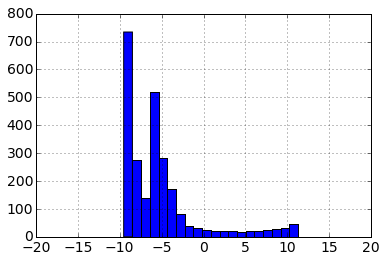

In [54]:
df['lgc_diff_2p'].hist(bins=20)
plt.xlim(-20, 20)


In [55]:
df['lgc_diff_2p'].describe()

count    2541.000000
mean       -5.357089
std         4.644995
min        -9.546763
25%        -8.764205
50%        -6.073134
75%        -4.587839
max        11.284008
Name: lgc_diff_2p, dtype: float64

In [56]:
#df['lgc_diff_sm'].hist(bins=20)
#plt.xlim(-200, 200)

In [57]:
df['h_2p'].describe()

count    2541.000000
mean      239.469525
std       106.019572
min        91.358531
25%       151.704669
50%       245.146378
75%       286.201049
max       486.809765
Name: h_2p, dtype: float64

In [58]:
#df['lgc_diff_cm'].hist(bins=20)
#plt.xlim(-200, 200)

In [59]:
#df['lgc_diff_cm'].describe()

(-0.2, 0.2)

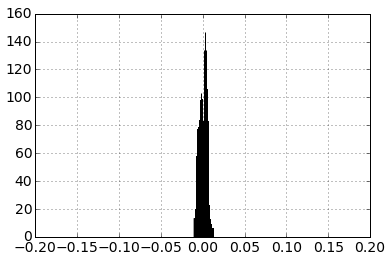

In [60]:
df['nr_diff_2p'].hist(bins=40)
plt.xlim(-0.2, 0.2)

In [61]:
df['nr_diff_2p'].describe()

count    2.541000e+03
mean    -1.531024e-15
std      4.385229e-03
min     -1.019506e-02
25%     -3.428593e-03
50%      5.421426e-04
75%      3.467162e-03
max      1.220619e-02
Name: nr_diff_2p, dtype: float64

In [62]:
home_dir = os.getenv('HOME')
df.to_csv(os.path.join(home_dir,'Desktop/data.csv'))

In [63]:
df['nr_2p'].describe()

count    2541.000000
mean        0.964367
std         0.024550
min         0.912480
25%         0.941606
50%         0.969272
75%         0.985145
max         1.004513
Name: nr_2p, dtype: float64

In [64]:
df['phase'].describe()

count    2541.000000
mean        2.595828
std         0.693024
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: phase, dtype: float64